Coin toss example
* analytical closed form posterior expression

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta  # Ensure correct beta is used

In [10]:
# unknown bias
p = 0.6

# number of coin flips
N = 1000
# number of heads
k = 610

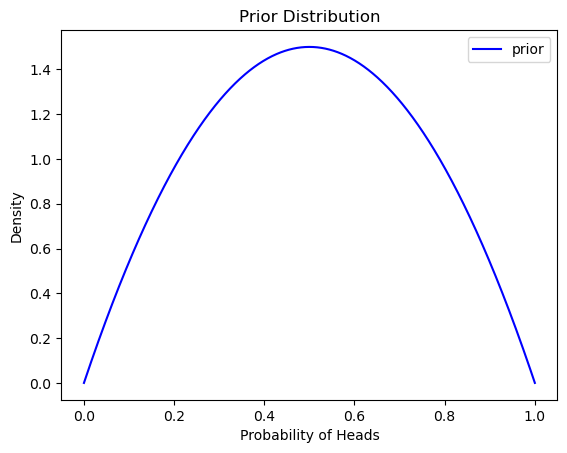

In [11]:
# prior
alpha0, beta0 = 2, 2
prior = beta(a=alpha0, b=beta0)

# plot pdf of prior
x = np.linspace(0, 1, 1000)
plt.plot(x, prior.pdf(x), label="prior", color="blue")
plt.title("Prior Distribution")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()

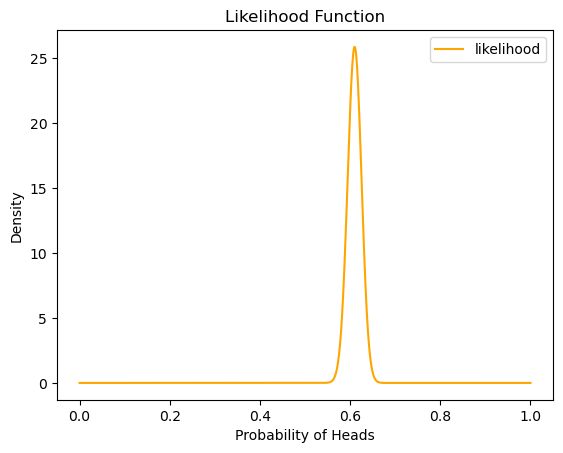

In [12]:
# normalised likelihood corresponding to k heads in N flips
likelihood = beta(a=k + 1, b=N - k + 1)

# plot pdf of likelihood
plt.figure()
plt.plot(x, likelihood.pdf(x), label="likelihood", color="orange")
plt.title("Likelihood Function")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")
plt.legend()

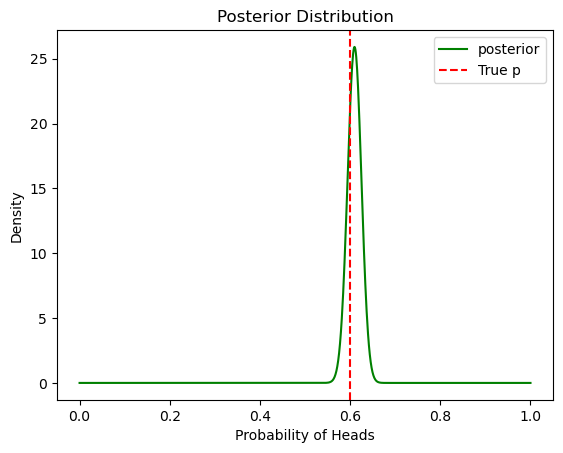

In [13]:
# posterior (we alr. have an analytical form)
posterior = beta(a=alpha0 + k, b=beta0 + N - k)

# plot pdf of posterior
plt.figure()
plt.plot(x, posterior.pdf(x), label="posterior", color="green")
plt.title("Posterior Distribution")
plt.xlabel("Probability of Heads")
plt.ylabel("Density")

plt.axvline(p, color="red", linestyle="--", label="True p")
plt.legend()
plt.show()

In [14]:
# posterior mean
posterior_mean = posterior.mean()
print(f"Posterior Mean: {posterior_mean}")

# posterior mode
posterior_mode = (alpha0 + k - 1) / (alpha0 + beta0 + N - 2)
print(f"Posterior Mode: {posterior_mode}")

# posterior variance
posterior_variance = posterior.var()
print(f"Posterior Variance: {posterior_variance}")

Posterior Mean: 0.6095617529880478
Posterior Mode: 0.6097804391217565
Posterior Variance: 0.00023681216147481194


frequentist scheme experiment

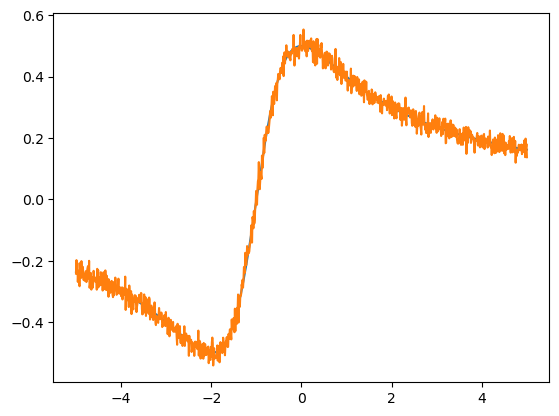

In [15]:
import numpy as np
import matplotlib.pyplot as plt


def alpha_th(B_tot, Gamma):
    return B_tot / (B_tot**2 + Gamma**2)


def alpha_exp(alpha_th, sigma):
    return alpha_th + np.random.normal(0, sigma, size=alpha_th.shape)


Gamma = 1
B_unk = 1
sigma = 0.02

B_bias = np.linspace(-5, 5, 1000)
B_tot = B_unk + B_bias

alpha_vals = alpha_th(B_tot, Gamma)
plt.plot(B_bias, alpha_vals)

alpha_exp_vals = alpha_exp(alpha_vals, sigma)
plt.plot(B_bias, alpha_exp_vals)

Measurement problem
* Incorporating Gaussian noise and recovering continuous parameter. 

Recover $\lambda$ from $N(t) = N_0 e^{-\lambda t}$

Assume Gaussian noise in measurements with known variance $\sigma^2$.

Likelihood: 

$P(y \mid \lambda) \propto \prod_{i} \exp\!\left(-\frac{(y_i - N_0 e^{-\lambda t_i})^2}{2\sigma^2}\right)$


In [17]:
# Run adaptive Bayesian experiment from module
import numpy as np
import matplotlib.pyplot as plt
from bayes_experiment import run_experiment

# Fix RNG for reproducibility in the notebook
rng = np.random.default_rng(42)
B_true = 0.4
B_grid, posteriors, biases = run_experiment(
    N_exp=5, B_true=B_true, Gamma=1.0, sigma=0.05, B_range=(-1, 1), n_grid=500, rng=rng
)

Final posterior area (should be ~1): 1.000000


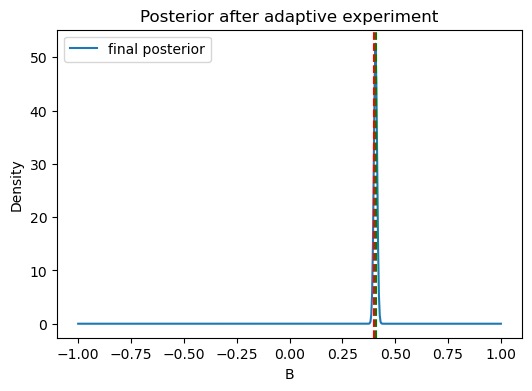

Chosen biases: [0.0, -0.375, -0.4166666666666667, -0.4166666666666667, -0.4166666666666667]
0.40681362725450887
0.4


Text(0, 0.5, 'Density')

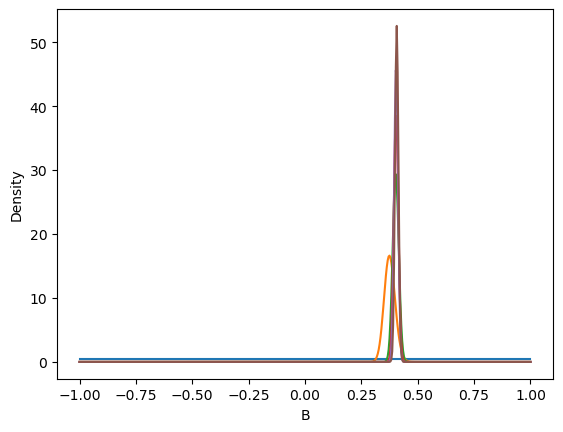

In [ ]:
# Plot final posterior and show chosen biases
from scipy.integrate import simpson

final_posterior = posteriors[-1]
area = simpson(final_posterior, B_grid)
print(f"Final posterior area (should be ~1): {area:.6f}")

plt.figure(figsize=(6, 4))
plt.plot(B_grid, final_posterior, label="final posterior")
plt.xlabel("B")
plt.ylabel("Density")
plt.title("Posterior after adaptive experiment")
plt.legend()
plt.axvline(0.4, color="red", linestyle="--", label="True B")
plt.axvline(
    B_grid[np.argmax(final_posterior)],
    color="green",
    linestyle="--",
    label="MAP Estimate",
)
plt.show()

print("Chosen biases:", biases)
print(B_grid[np.argmax(final_posterior)])
print(B_true)

for i in range(len(posteriors)):
    plt.plot(B_grid, posteriors[i], label=f"Exp {i}")
plt.xlabel("B")
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Evolution")
plt.show()

In [ ]:
# TODO: Parallelise
# TODO: compare with frequentist zero crossing approach: give quantitative estimate of:
# 1. amount of readings required for both
# 2. accuracy of estimate for both
# 3. inference time for both
# 4. benchmark KL divergence computation costs


# at what point does the integral become incomputable
# 